In [ ]:
#Importing essential libraries for data handling, model training, and evaluation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [ ]:
#loading Data
path='/content/Housing.csv'
df = pd.read_csv(path)

In [ ]:
#looking at the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#Performing an exploratory data analysis (EDA) to understand the distribution,
print(df.head())
print(df.describe())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [ ]:
#looking if there is any missing data
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
parking,0
mainroad_yes,0
guestroom_yes,0
basement_yes,0
hotwaterheating_yes,0


In [ ]:
#Using function from the pandas library to perform one-hot encoding on categorical features within the DataFrame
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#spliting the data into features  and target
numeric_features = df.drop(columns=['price'])
target = df['price']
target

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
numeric_features = numeric_features.fillna(numeric_features.mean())
numeric_features

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [ ]:
#Spliting the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Define a function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}")
    print(f"{model_name} - R² Score: {r2:.2f}")
    return mse, r2

In [ ]:
# Evaluate each model
mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
mse_tree, r2_tree = evaluate_model(y_test, y_pred_tree, "Decision Tree")
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression - Mean Squared Error: 1754318687330.66
Linear Regression - R² Score: 0.65
Decision Tree - Mean Squared Error: 2642802637614.68
Decision Tree - R² Score: 0.48
Random Forest - Mean Squared Error: 1961585044320.34
Random Forest - R² Score: 0.61


<ipython-input-49-f7f0afc14a8d>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(models, rotation=45, ha="right")
<ipython-input-49-f7f0afc14a8d>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(models, rotation=45, ha="right")


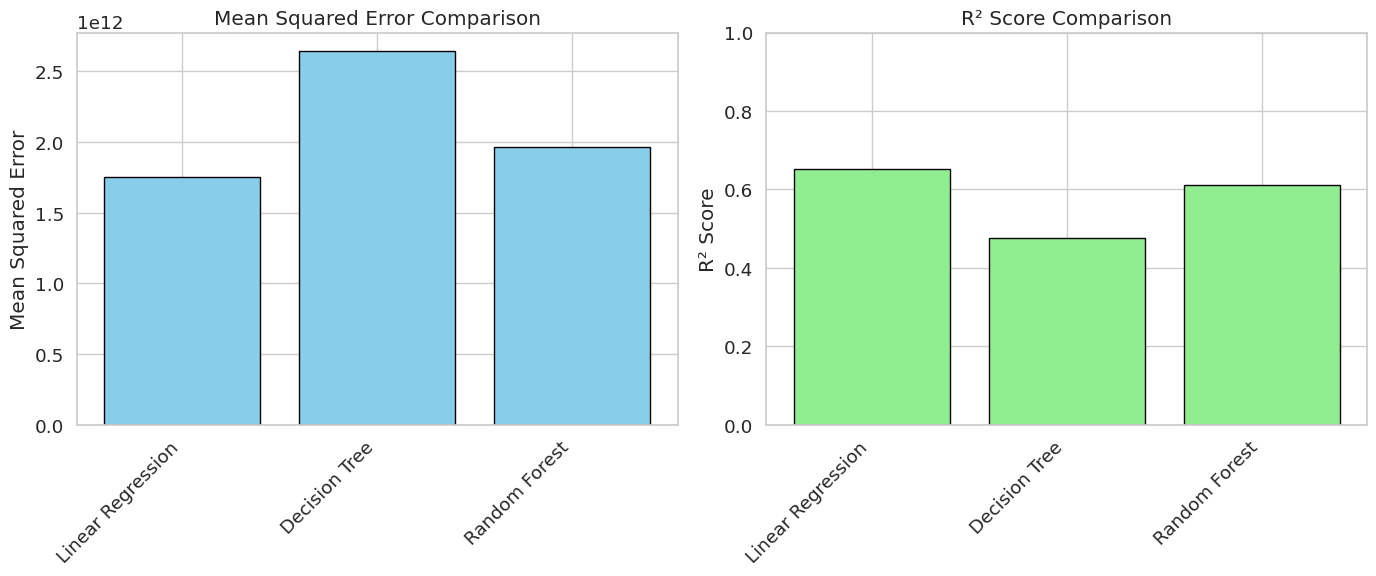

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_lr, mse_tree, mse_rf]
r2_values = [r2_lr, r2_tree, r2_rf]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE Comparison
ax[0].bar(models, mse_values, color='skyblue', edgecolor='black')
ax[0].set_title("Mean Squared Error Comparison")
ax[0].set_ylabel("Mean Squared Error")
ax[0].set_xticklabels(models, rotation=45, ha="right")

# R^2 Score Comparison
ax[1].bar(models, r2_values, color='lightgreen', edgecolor='black')
ax[1].set_title("R² Score Comparison")
ax[1].set_ylabel("R² Score")
ax[1].set_ylim(0, 1)  # R² score ranges from 0 to 1
ax[1].set_xticklabels(models, rotation=45, ha="right")

plt.tight_layout()
plt.show()


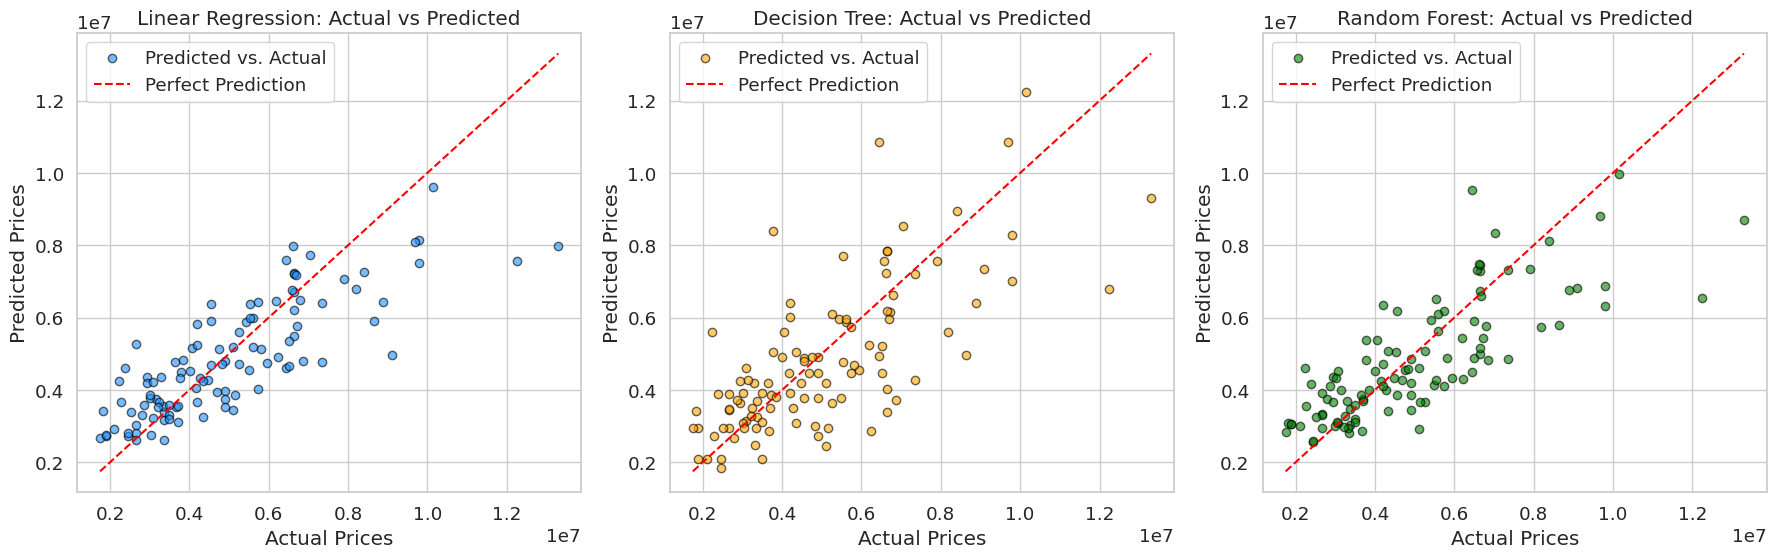

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Linear Regression
ax[0].scatter(y_test, y_pred_lr, alpha=0.6, color="dodgerblue", edgecolor="black", label="Predicted vs. Actual")
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
ax[0].set_title("Linear Regression: Actual vs Predicted")
ax[0].set_xlabel("Actual Prices")
ax[0].set_ylabel("Predicted Prices")
ax[0].legend()

# Decision Tree
ax[1].scatter(y_test, y_pred_tree, alpha=0.6, color="orange", edgecolor="black", label="Predicted vs. Actual")
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
ax[1].set_title("Decision Tree: Actual vs Predicted")
ax[1].set_xlabel("Actual Prices")
ax[1].set_ylabel("Predicted Prices")
ax[1].legend()

# Random Forest
ax[2].scatter(y_test, y_pred_rf, alpha=0.6, color="green", edgecolor="black", label="Predicted vs. Actual")
ax[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
ax[2].set_title("Random Forest: Actual vs Predicted")
ax[2].set_xlabel("Actual Prices")
ax[2].set_ylabel("Predicted Prices")
ax[2].legend()

plt.tight_layout()
plt.show()